___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Supervised Learning Capstone Project - Tree Methods Focus



## Make sure to review the introduction video to understand the 3 ways of approaching this project exercise!

----

**Ways to approach the project:**
   1. Open a new notebook, read in the data, and then analyze and visualize whatever you want, then create a predictive model.
   2. Use this notebook as a general guide, completing the tasks in bold shown below.
   3. Skip to the solutions notebook and video, and treat project at a more relaxing code along walkthrough lecture series.

------
------

## GOAL: Create a model to predict whether or not a customer will Churn .

----
----


## Complete the Tasks in Bold Below!

## Part 0: Imports and Read in the Data

**TASK: Run the filled out cells below to import libraries and read in your data. The data file is "Telco-Customer-Churn.csv"**

# Import libraries & Data

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/Pipbytes/datasets/refs/heads/main/Classification/Telco-Customer-Churn.csv')
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

# EDA


## Data inspection

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [10]:
# Numeric columns statistial summary
df.describe().T

count         mean          std    min       25%       50%  \
SeniorCitizen   7032.0     0.162400     0.368844   0.00    0.0000     0.000   
tenure          7032.0    32.421786    24.545260   1.00    9.0000    29.000   
MonthlyCharges  7032.0    64.798208    30.085974  18.25   35.5875    70.350   
TotalCharges    7032.0  2283.300441  2266.771362  18.80  401.4500  1397.475   

                      75%      max  
SeniorCitizen      0.0000     1.00  
tenure            55.0000    72.00  
MonthlyCharges    89.8625   118.75  
TotalCharges    3794.7375  8684.80

In [9]:
# Categorical columns statistial summary
df.describe(include='object').T

count unique               top  freq
customerID        7032   7032        7590-VHVEG     1
gender            7032      2              Male  3549
Partner           7032      2                No  3639
Dependents        7032      2                No  4933
PhoneService      7032      2               Yes  6352
MultipleLines     7032      3                No  3385
InternetService   7032      3       Fiber optic  3096
OnlineSecurity    7032      3                No  3497
OnlineBackup      7032      3                No  3087
DeviceProtection  7032      3                No  3094
TechSupport       7032      3                No  3472
StreamingTV       7032      3                No  2809
StreamingMovies   7032      3                No  2781
Contract          7032      3    Month-to-month  3875
PaperlessBilling  7032      2               Yes  4168
PaymentMethod     7032      4  Electronic check  2365
Churn             7032      2                No  5163

In [16]:
if df.isnull().sum().any():
  print('There is missing values in the dataset\n')
  print(df.isnull().sum())
elif df.isna().sum().any():
  print('There is NA values in the dataset\n')
  print(df.isnull().sum())
else:
  print('data is complete')

data is complete


## Data distribution

<Figure size 1200x600 with 0 Axes>

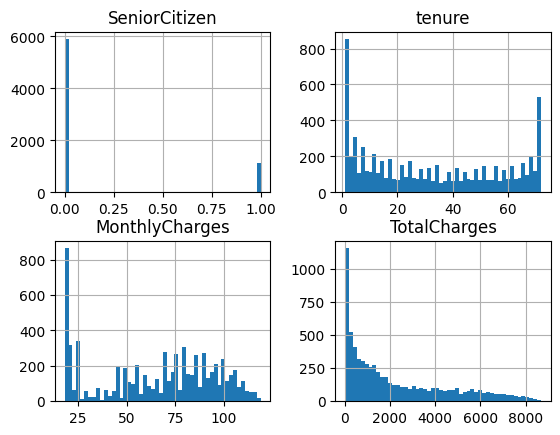

In [10]:
plt.figure(figsize=(12,6))
df.hist(bins=50)
plt.show();

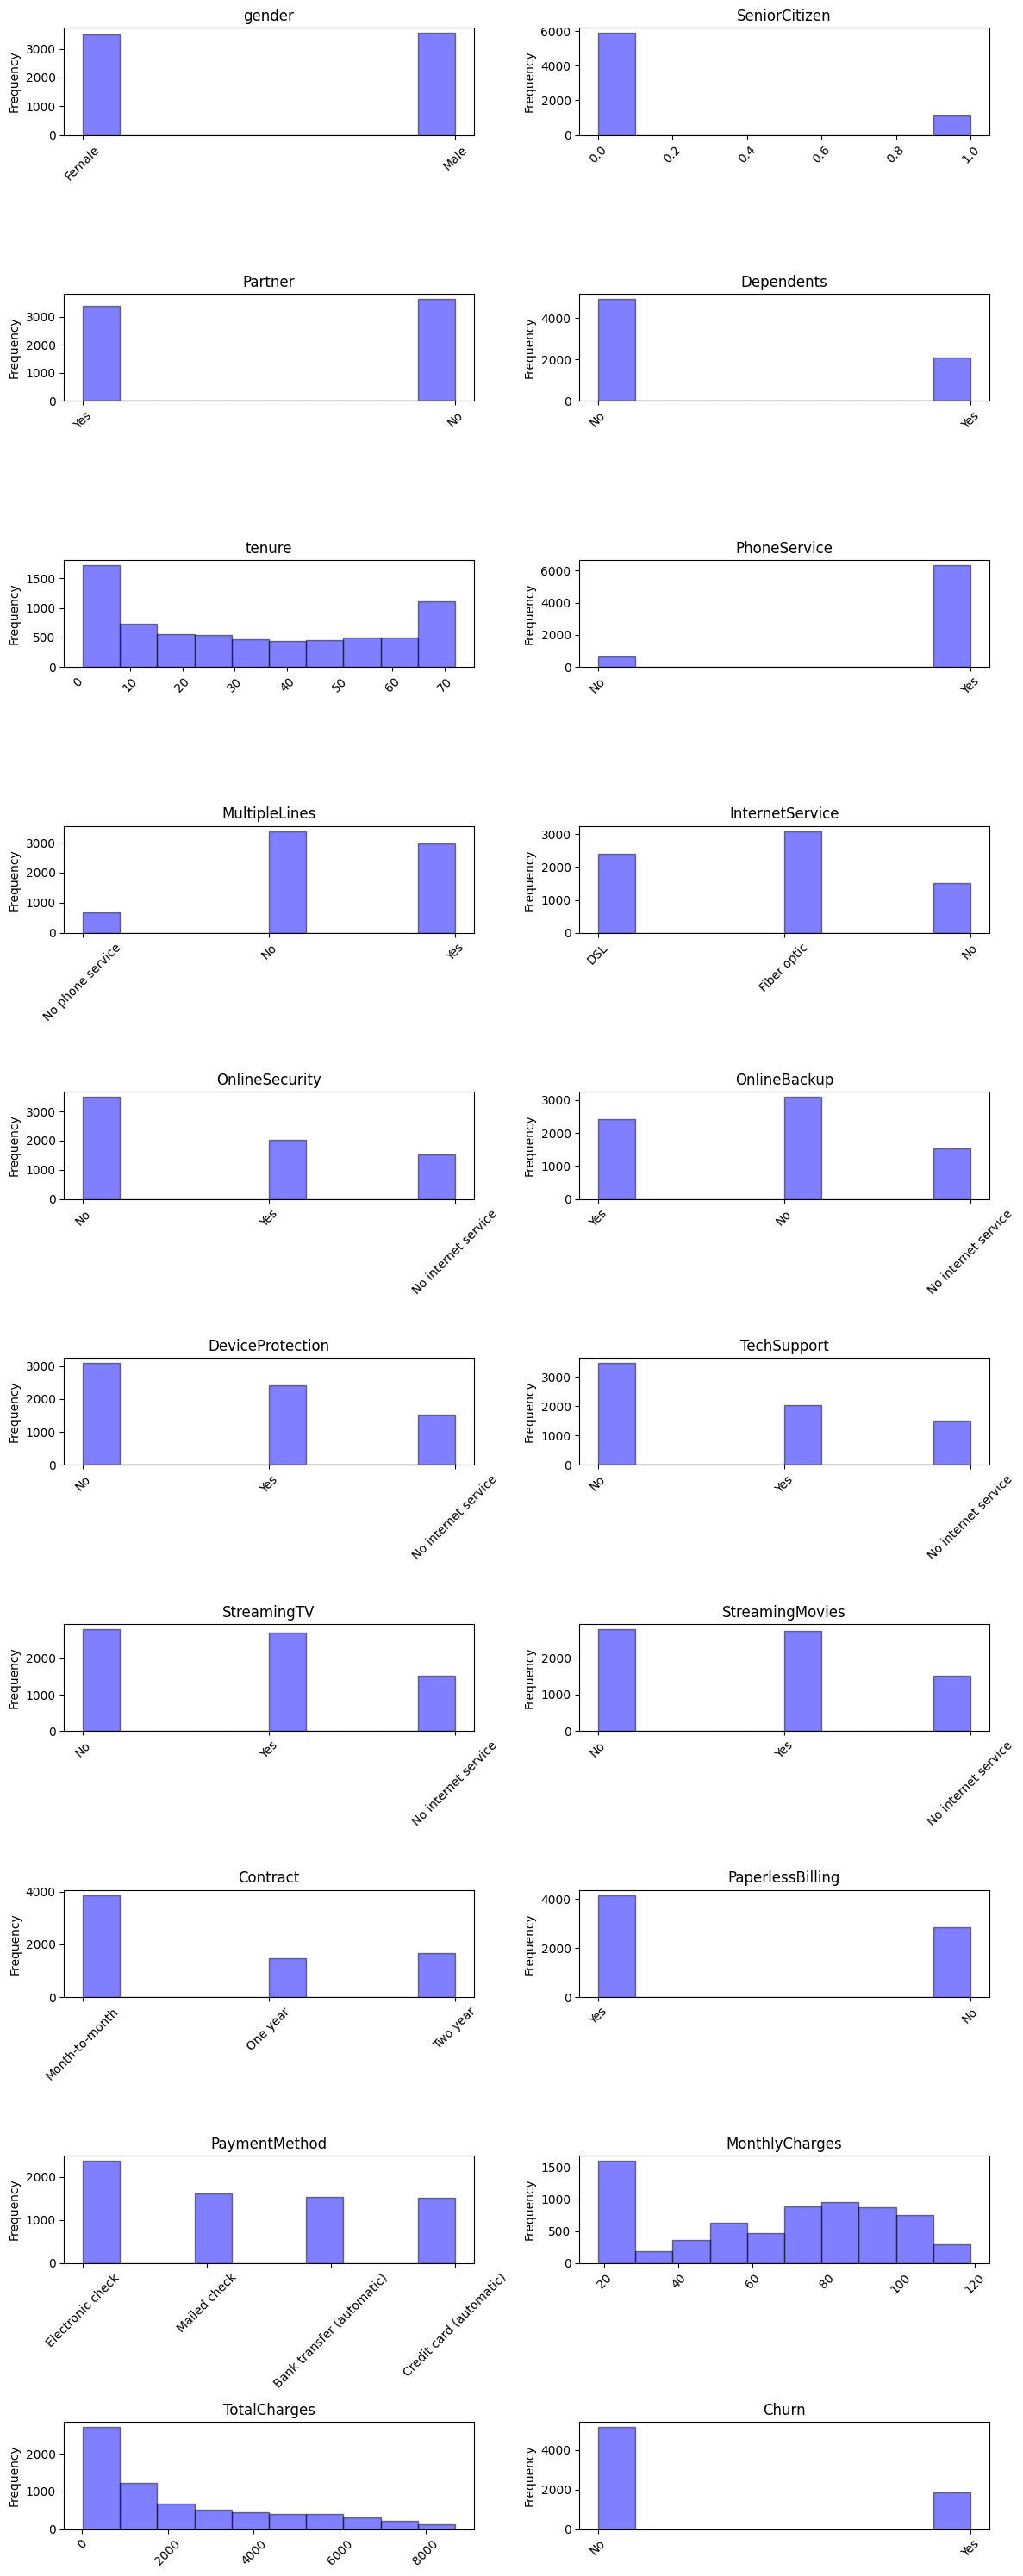

In [33]:
# set up subplots
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(12, 30), tight_layout=True)

# flatten axes array for easy iterations
axes = axes.flatten()

# histogram
for i, features in enumerate(df.columns[1:]):
    axes[i].hist(df[features], bins=10, edgecolor='black', color='b', alpha=0.5)
    axes[i].set_title(features)
    axes[i].set_ylabel('Frequency')
    axes[i].xaxis.set_tick_params(rotation=45)

# show the plot
plt.show()

## Count plot


<Axes: xlabel='Churn', ylabel='count'>

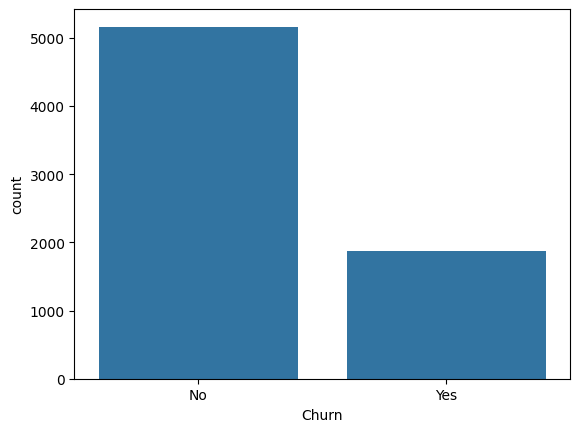

In [17]:
sns.countplot(data=df, x='Churn')

<img src='fig1.png' >

## Boxplot


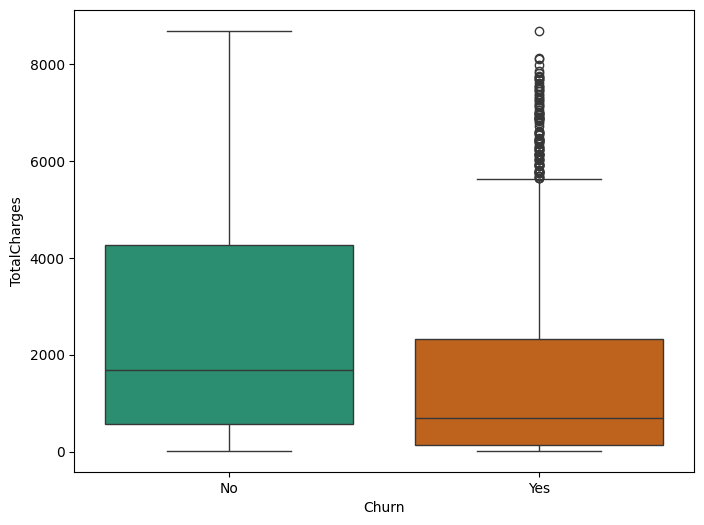

In [25]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn', y='TotalCharges', data=df, hue='Churn', palette='Dark2')
plt.show();

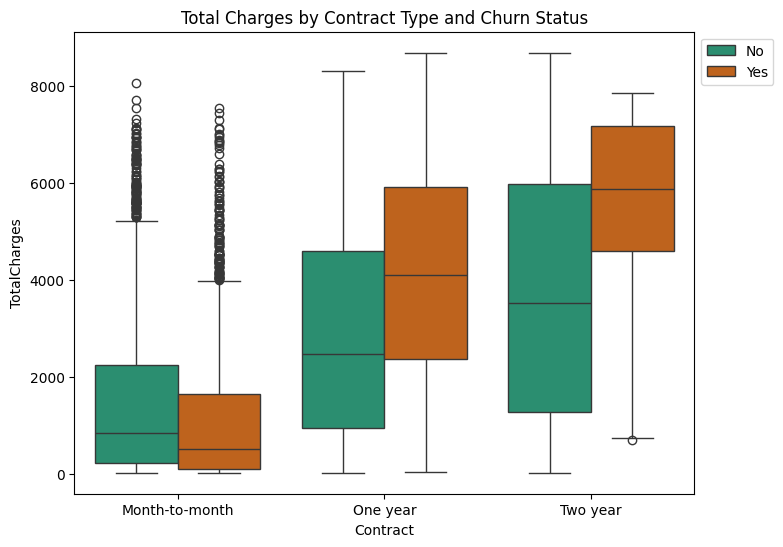

In [26]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Contract', y='TotalCharges', data=df, hue='Churn', palette='Dark2')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Shifts the legend outside the plot
plt.title("Total Charges by Contract Type and Churn Status")
plt.show()

## Cat plot

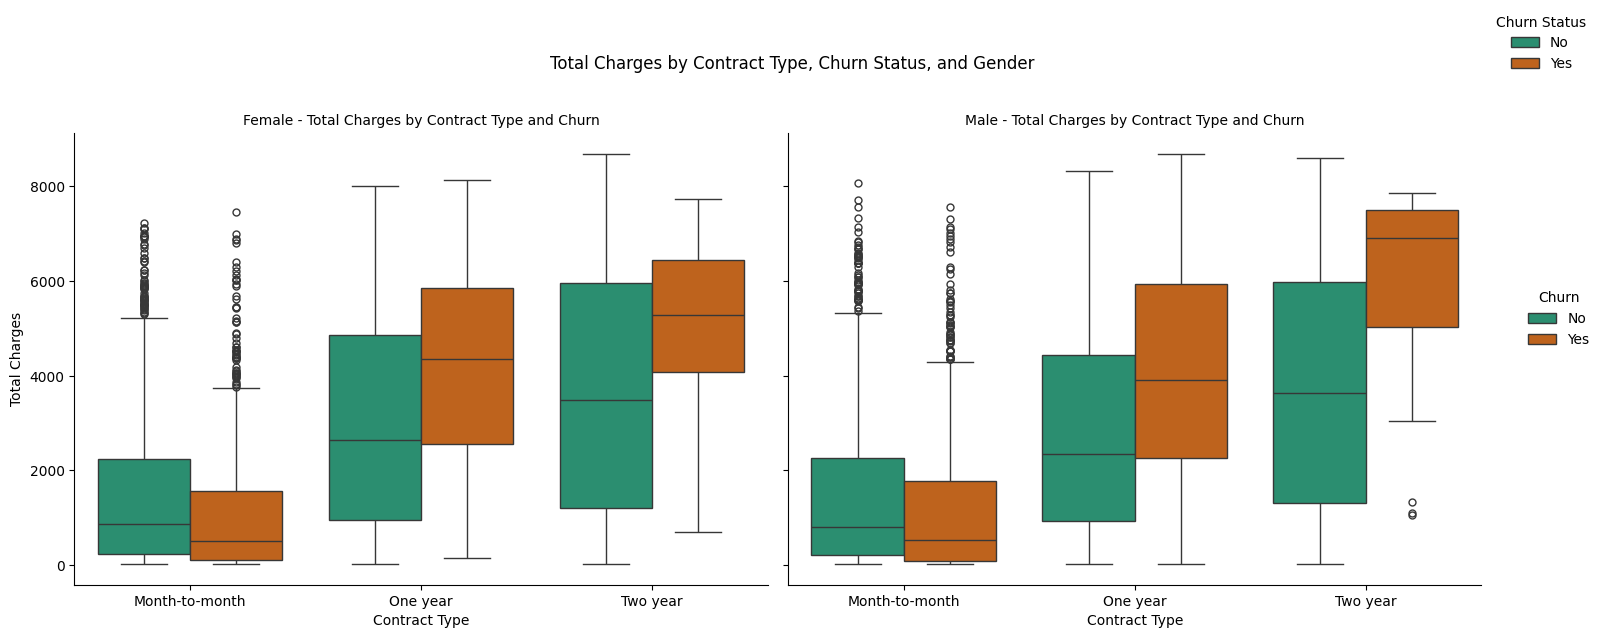

In [37]:
# Improved catplot code
import seaborn as sns
import matplotlib.pyplot as plt

# Adjusted catplot
g = sns.catplot(
    x='Contract', y='TotalCharges',
    data=df, hue='Churn', col='gender',
    palette='Dark2', kind="box",
    height=6, aspect=1.2
)

# Move the legend outside the plot
g.add_legend(title="Churn Status", bbox_to_anchor=(1, 1))

# Set titles and labels
g.set_titles("{col_name} - Total Charges by Contract Type and Churn")
g.set_axis_labels("Contract Type", "Total Charges")
plt.subplots_adjust(top=0.85)  # Adjust space for the title

# Set a main title
g.fig.suptitle("Total Charges by Contract Type, Churn Status, and Gender")
plt.show()


## Correlation Analysis


    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines',
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df2 = df.drop(columns=['customerID'], axis=1, inplace=True)
obj_cols = df.select_dtypes(include='object')
num_cols = df.select_dtypes(exclude='object')
obj_cols = pd.get_dummies(obj_cols, dtype=int # drop_first = True for regression, to prevent multicollinearity)
df2 = pd.concat([obj_cols, num_cols], axis=1)

In [22]:
plt.figure(figsize=(10,10), dpi=200)
sns.heatmap(df2.corr(), cmap='coolwarm')
plt.show()

In [33]:
corr2 = df2.corr()

plt.figure(figsize=(10,10),dpi=150)

# Bar plot to exlude churn (change to vertical plot by changing x,y)
sns.barplot(y=corr2['Churn_Yes'].sort_values().iloc[1:-1].index,
            x=corr2['Churn_Yes'].sort_values().iloc[1:-1].values,
            hue=corr2['Churn_Yes'].sort_values().iloc[1:-1].index, palette='coolwarm')

plt.title("Feature Correlation to Yes Churn")
plt.ylabel('Features')
plt.xlabel('Correlation')
plt.xticks(rotation=90);
plt.show();

In [40]:
# cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines',
#         'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
#         'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# corr = pd.get_dummies(df[cols]).corr() # drop_first = True for regression, to prevent multicollinearity

# plt.figure(figsize=(10,10), dpi=100)
# sns.heatmap(corr, cmap='coolwarm')
# plt.show();

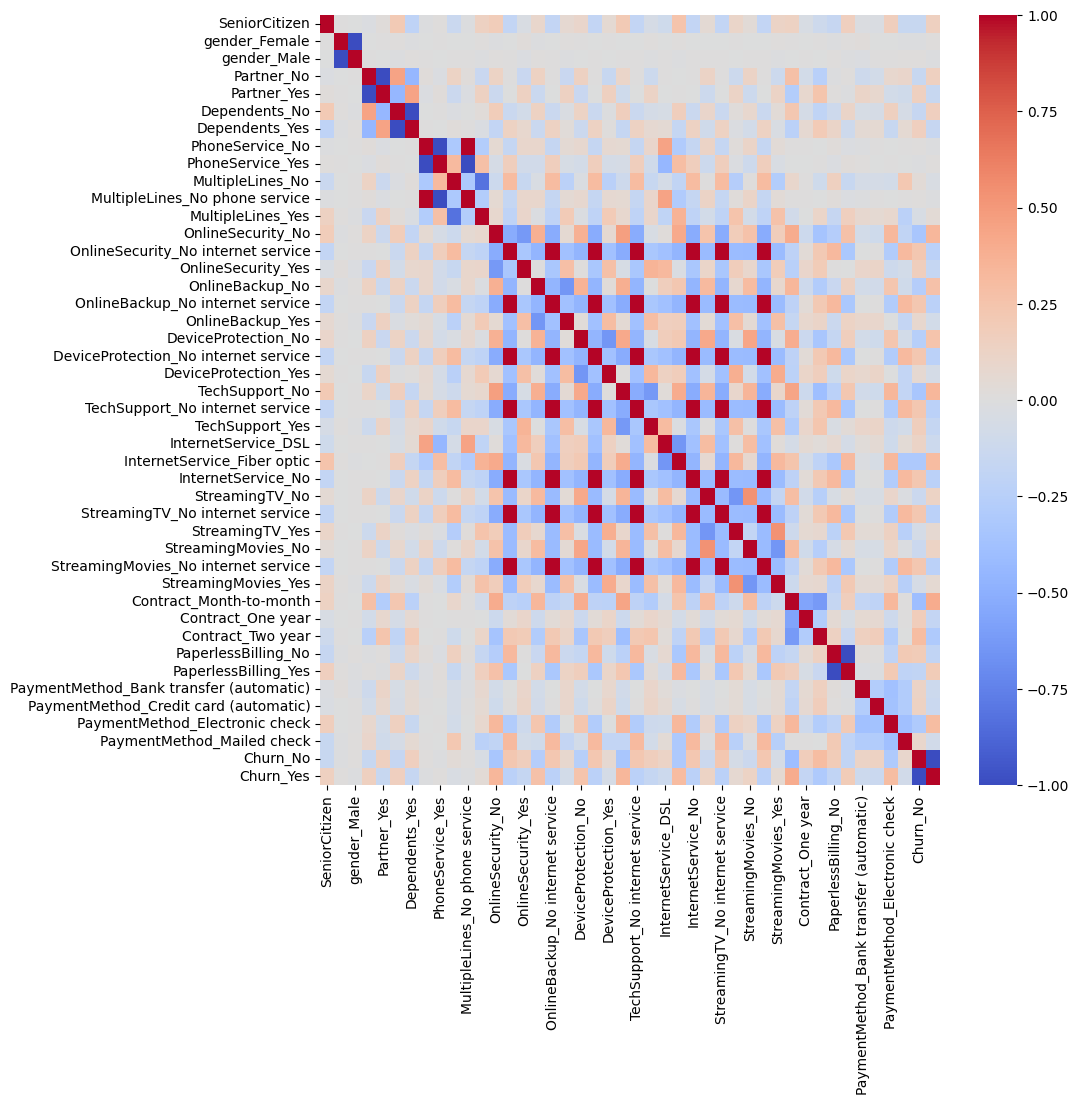

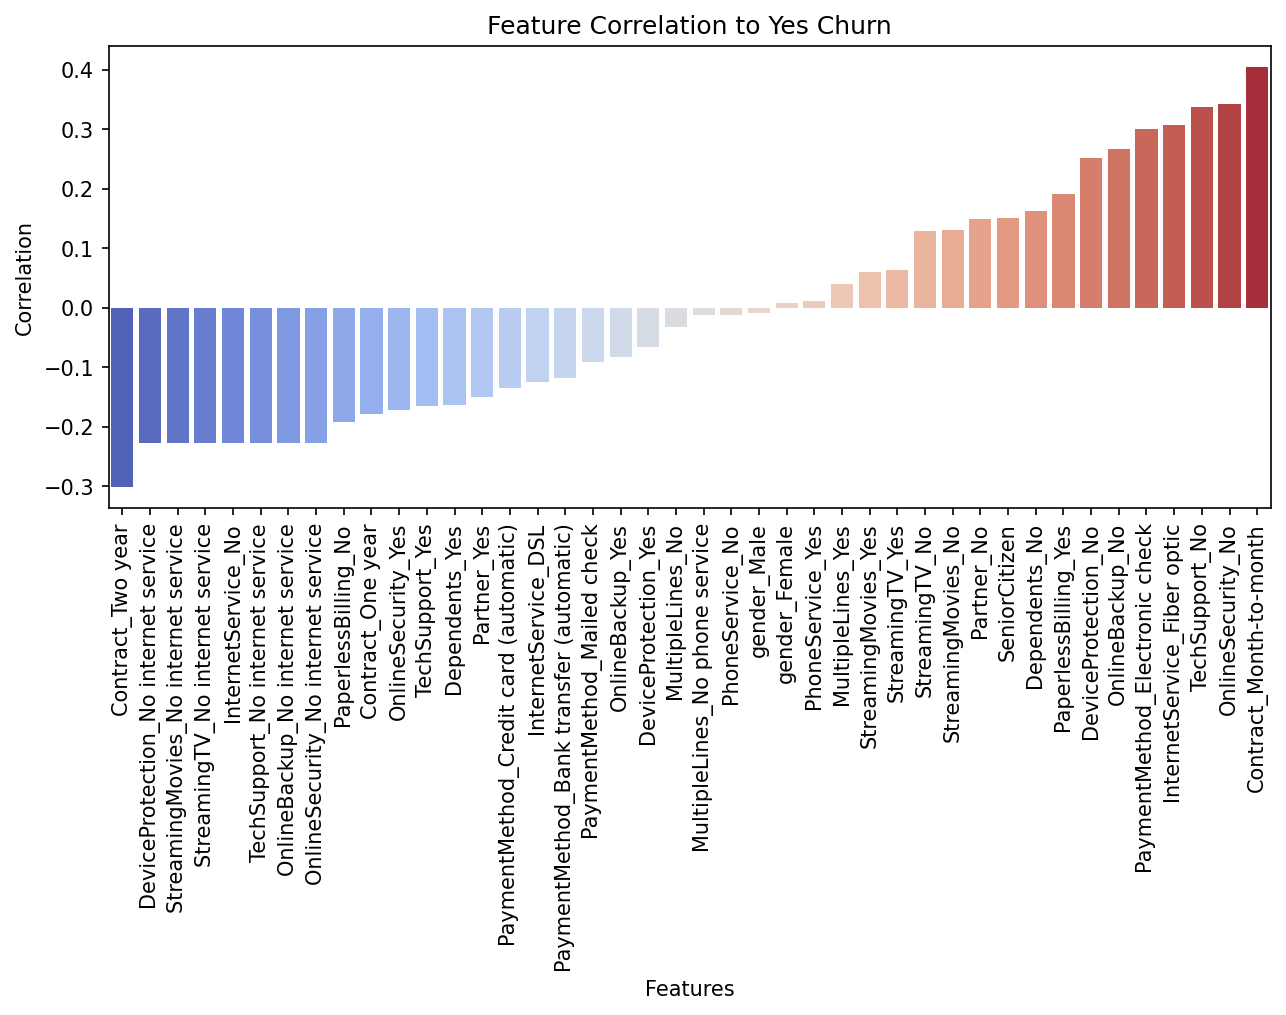

In [49]:
# plt.figure(figsize=(10,4),dpi=150)

# # Bar plot to exlude churn
# sns.barplot(x=corr['Churn_Yes'].sort_values().iloc[1:-1].index,
#             y=corr['Churn_Yes'].sort_values().iloc[1:-1].values,
#             hue=corr['Churn_Yes'].sort_values().iloc[1:-1].index, palette='coolwarm')

# plt.title("Feature Correlation to Yes Churn")
# plt.xlabel('Features')
# plt.ylabel('Correlation')
# plt.xticks(rotation=90);
# plt.show();

---
---

# Churn Analysis


## Contract by Churn

In [37]:
df.groupby('Contract')['Churn'].value_counts()

Contract        Churn
Month-to-month  No       2220
                Yes      1655
One year        No       1306
                Yes       166
Two year        No       1637
                Yes        48
Name: count, dtype: int64

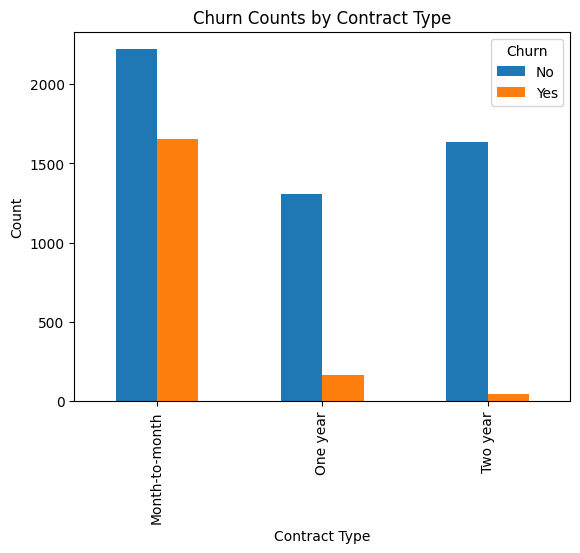

In [43]:
contract_churn = df.groupby('Contract')['Churn'].value_counts().unstack()
contract_churn.plot(kind='bar')

# Add labels and title
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.title("Churn Counts by Contract Type")
plt.show();

## Tenure by churn

<Axes: xlabel='tenure', ylabel='Count'>

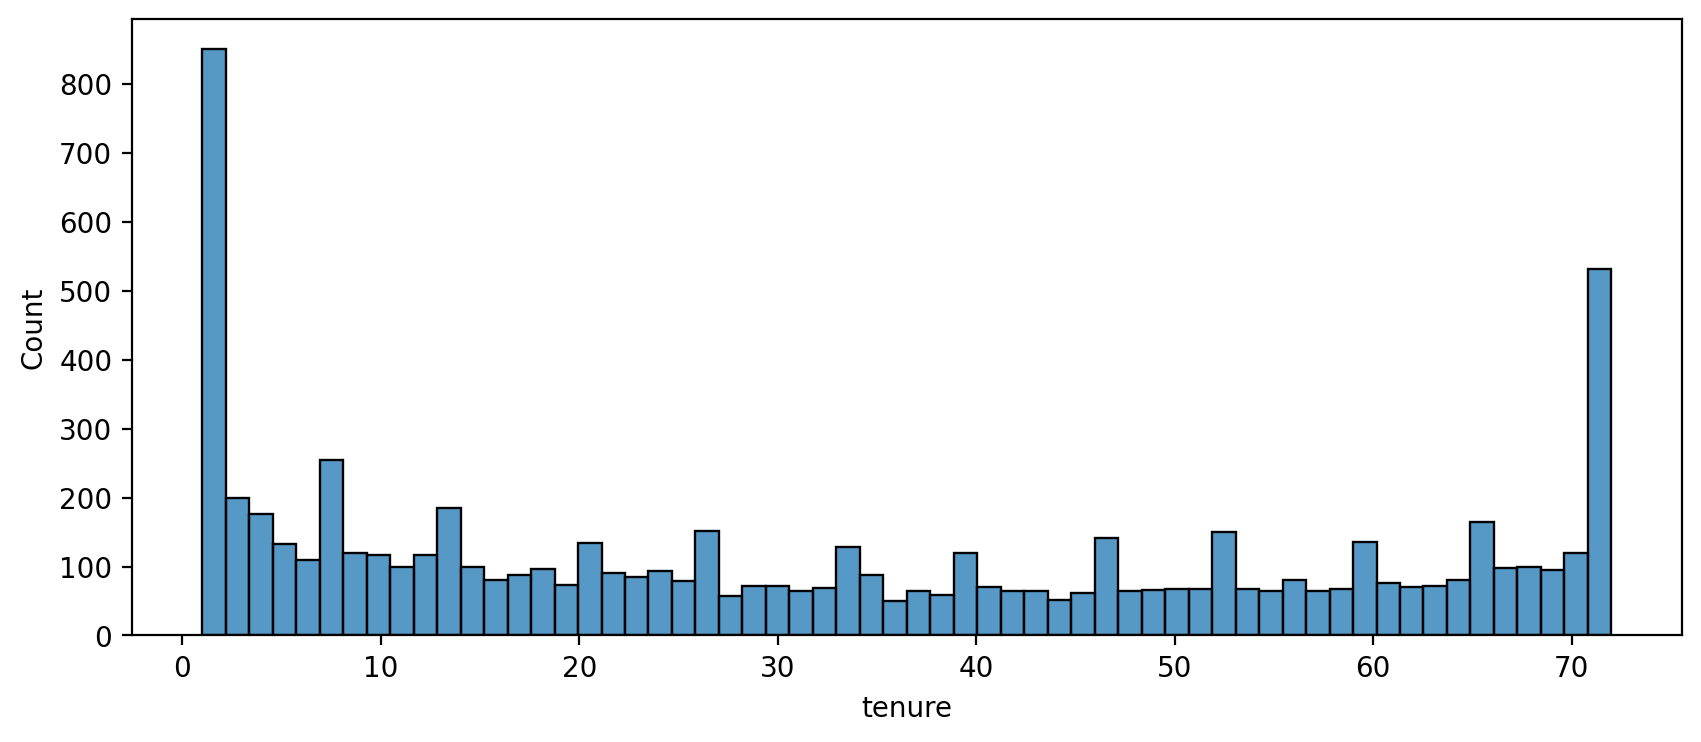

In [44]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=df,x='tenure',bins=60)

<Figure size 2000x600 with 0 Axes>

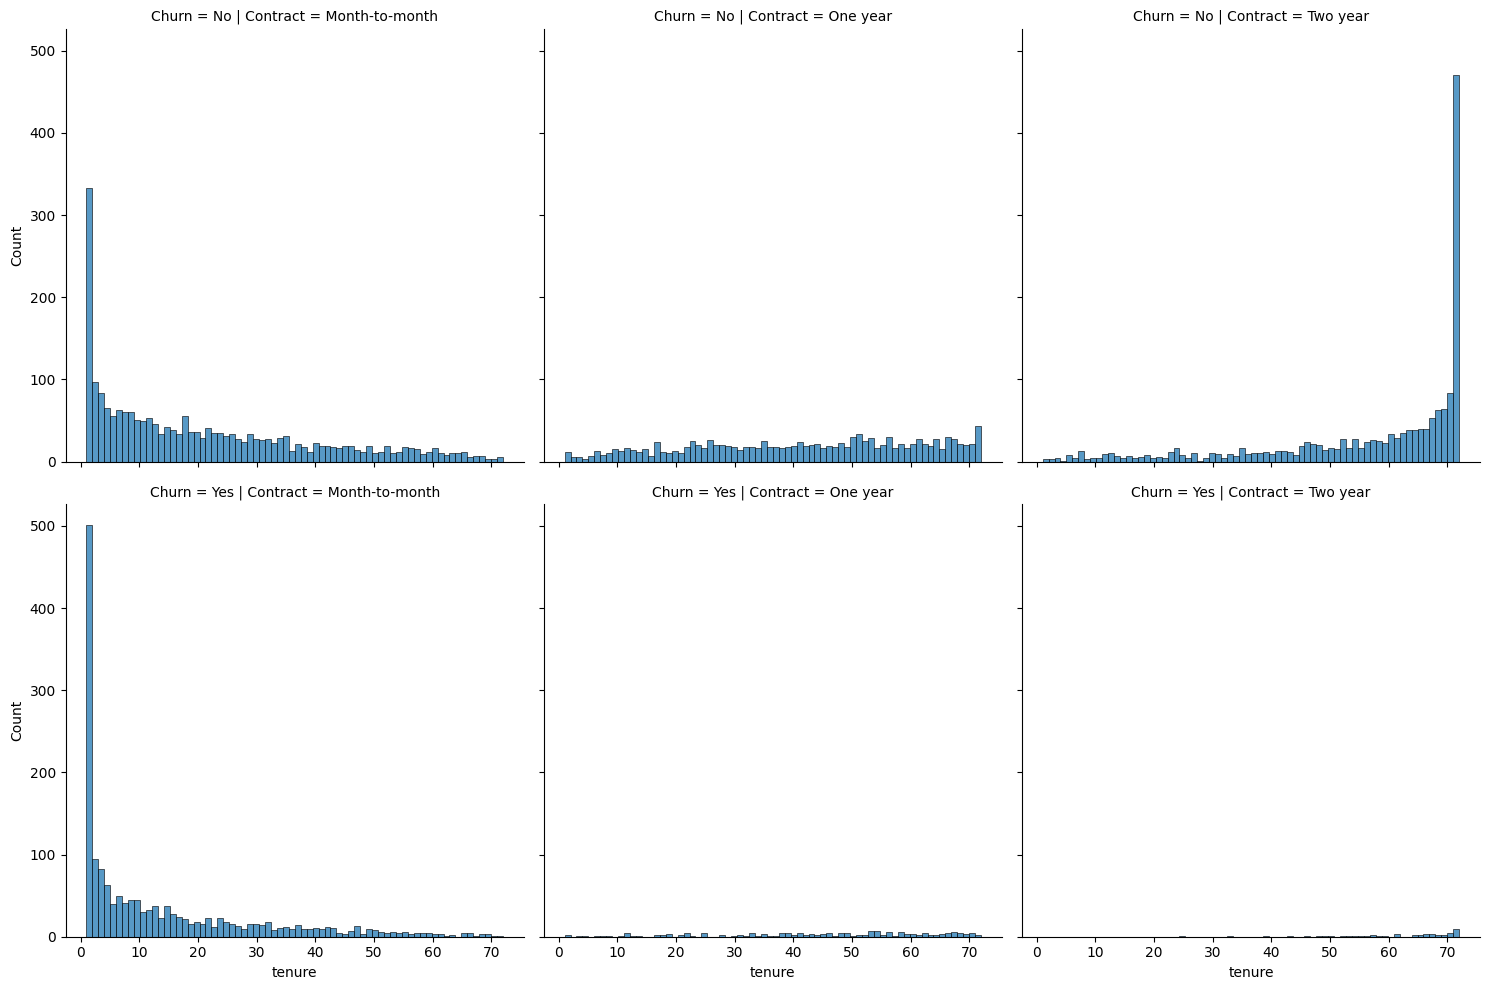

In [45]:
plt.figure(figsize=(10,3),dpi=200)
sns.displot(data=df,x='tenure',bins=70,col='Contract',row='Churn');

## Charges by Churn

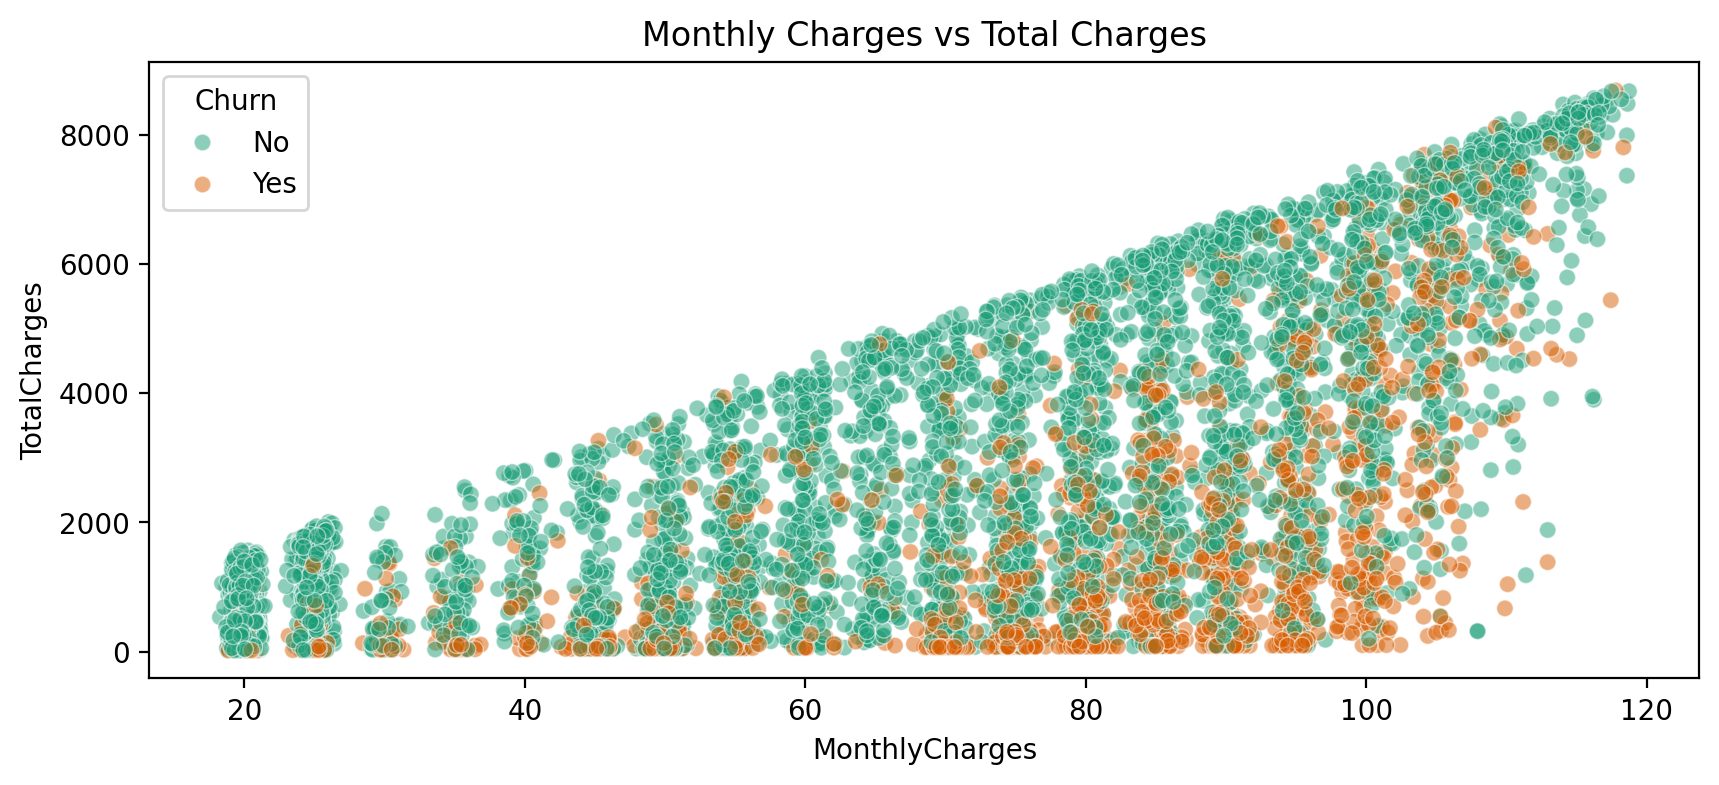

In [47]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn', linewidth=0.5,alpha=0.5,palette='Dark2')
plt.title('Monthly Charges vs Total Charges')
plt.show();

**TASK: Display a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.**

In [ ]:
#CODE HERE

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<img src='fig7.png'>

### Creating Cohorts based on Tenure

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

**TASK: Treating each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. You should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.**

In [ ]:
#CODE HERE

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

**TASK: Now that you have Churn Rate per tenure group 1-72 months, create a plot showing churn rate per months of tenure.**

In [ ]:
#CODE HERE

<img src='fig9.png'>

### Broader Cohort Groups
**TASK: Based on the tenure column values, create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [ ]:
# CODE HERE

tenure   Tenure Cohort
0       1     0-12 Months
1      34    24-48 Months
2       2     0-12 Months
3      45    24-48 Months
4       2     0-12 Months
5       8     0-12 Months
6      22    12-24 Months
7      10     0-12 Months
8      28    24-48 Months
9      62  Over 48 Months

**TASK: Create a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort defined in the previous task.**

In [ ]:
#CODE HERE

<img src='fig10.png'>

**TASK: Create a count plot showing the churn count per cohort.**

In [ ]:
# CODE HERE

<img src='cplot.png'>

**TASK: Create a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.**

In [ ]:
#CODE HERE

<img src='fig11.png'>

-----

# Part 4: Predictive Modeling

**Let's explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting. Feel free to add any other supervised learning models to your comparisons!**


## Single Decision Tree

**TASK : Separate out the data into X features and Y label. Create dummy variables where necessary and note which features are not useful and should be dropped.**

In [ ]:
#CODE HERE

**TASK: Perform a train test split, holding out 10% of the data for testing. We'll use a random_state of 101 in the solutions notebook/video.**

In [ ]:
#CODE HERE

**TASK: Decision Tree Perfomance. Complete the following tasks:**
   1. Train a single decision tree model (feel free to grid search for optimal hyperparameters).
   2. Evaluate performance metrics from decision tree, including classification report and plotting a confusion matrix.
   2. Calculate feature importances from the decision tree.
   4. OPTIONAL: Plot your tree, note, the tree could be huge depending on your pruning, so it may crash your notebook if you display it with plot_tree.

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



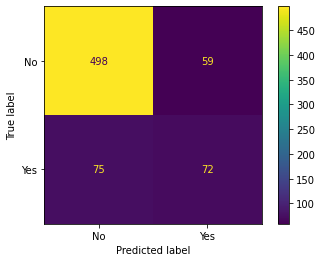

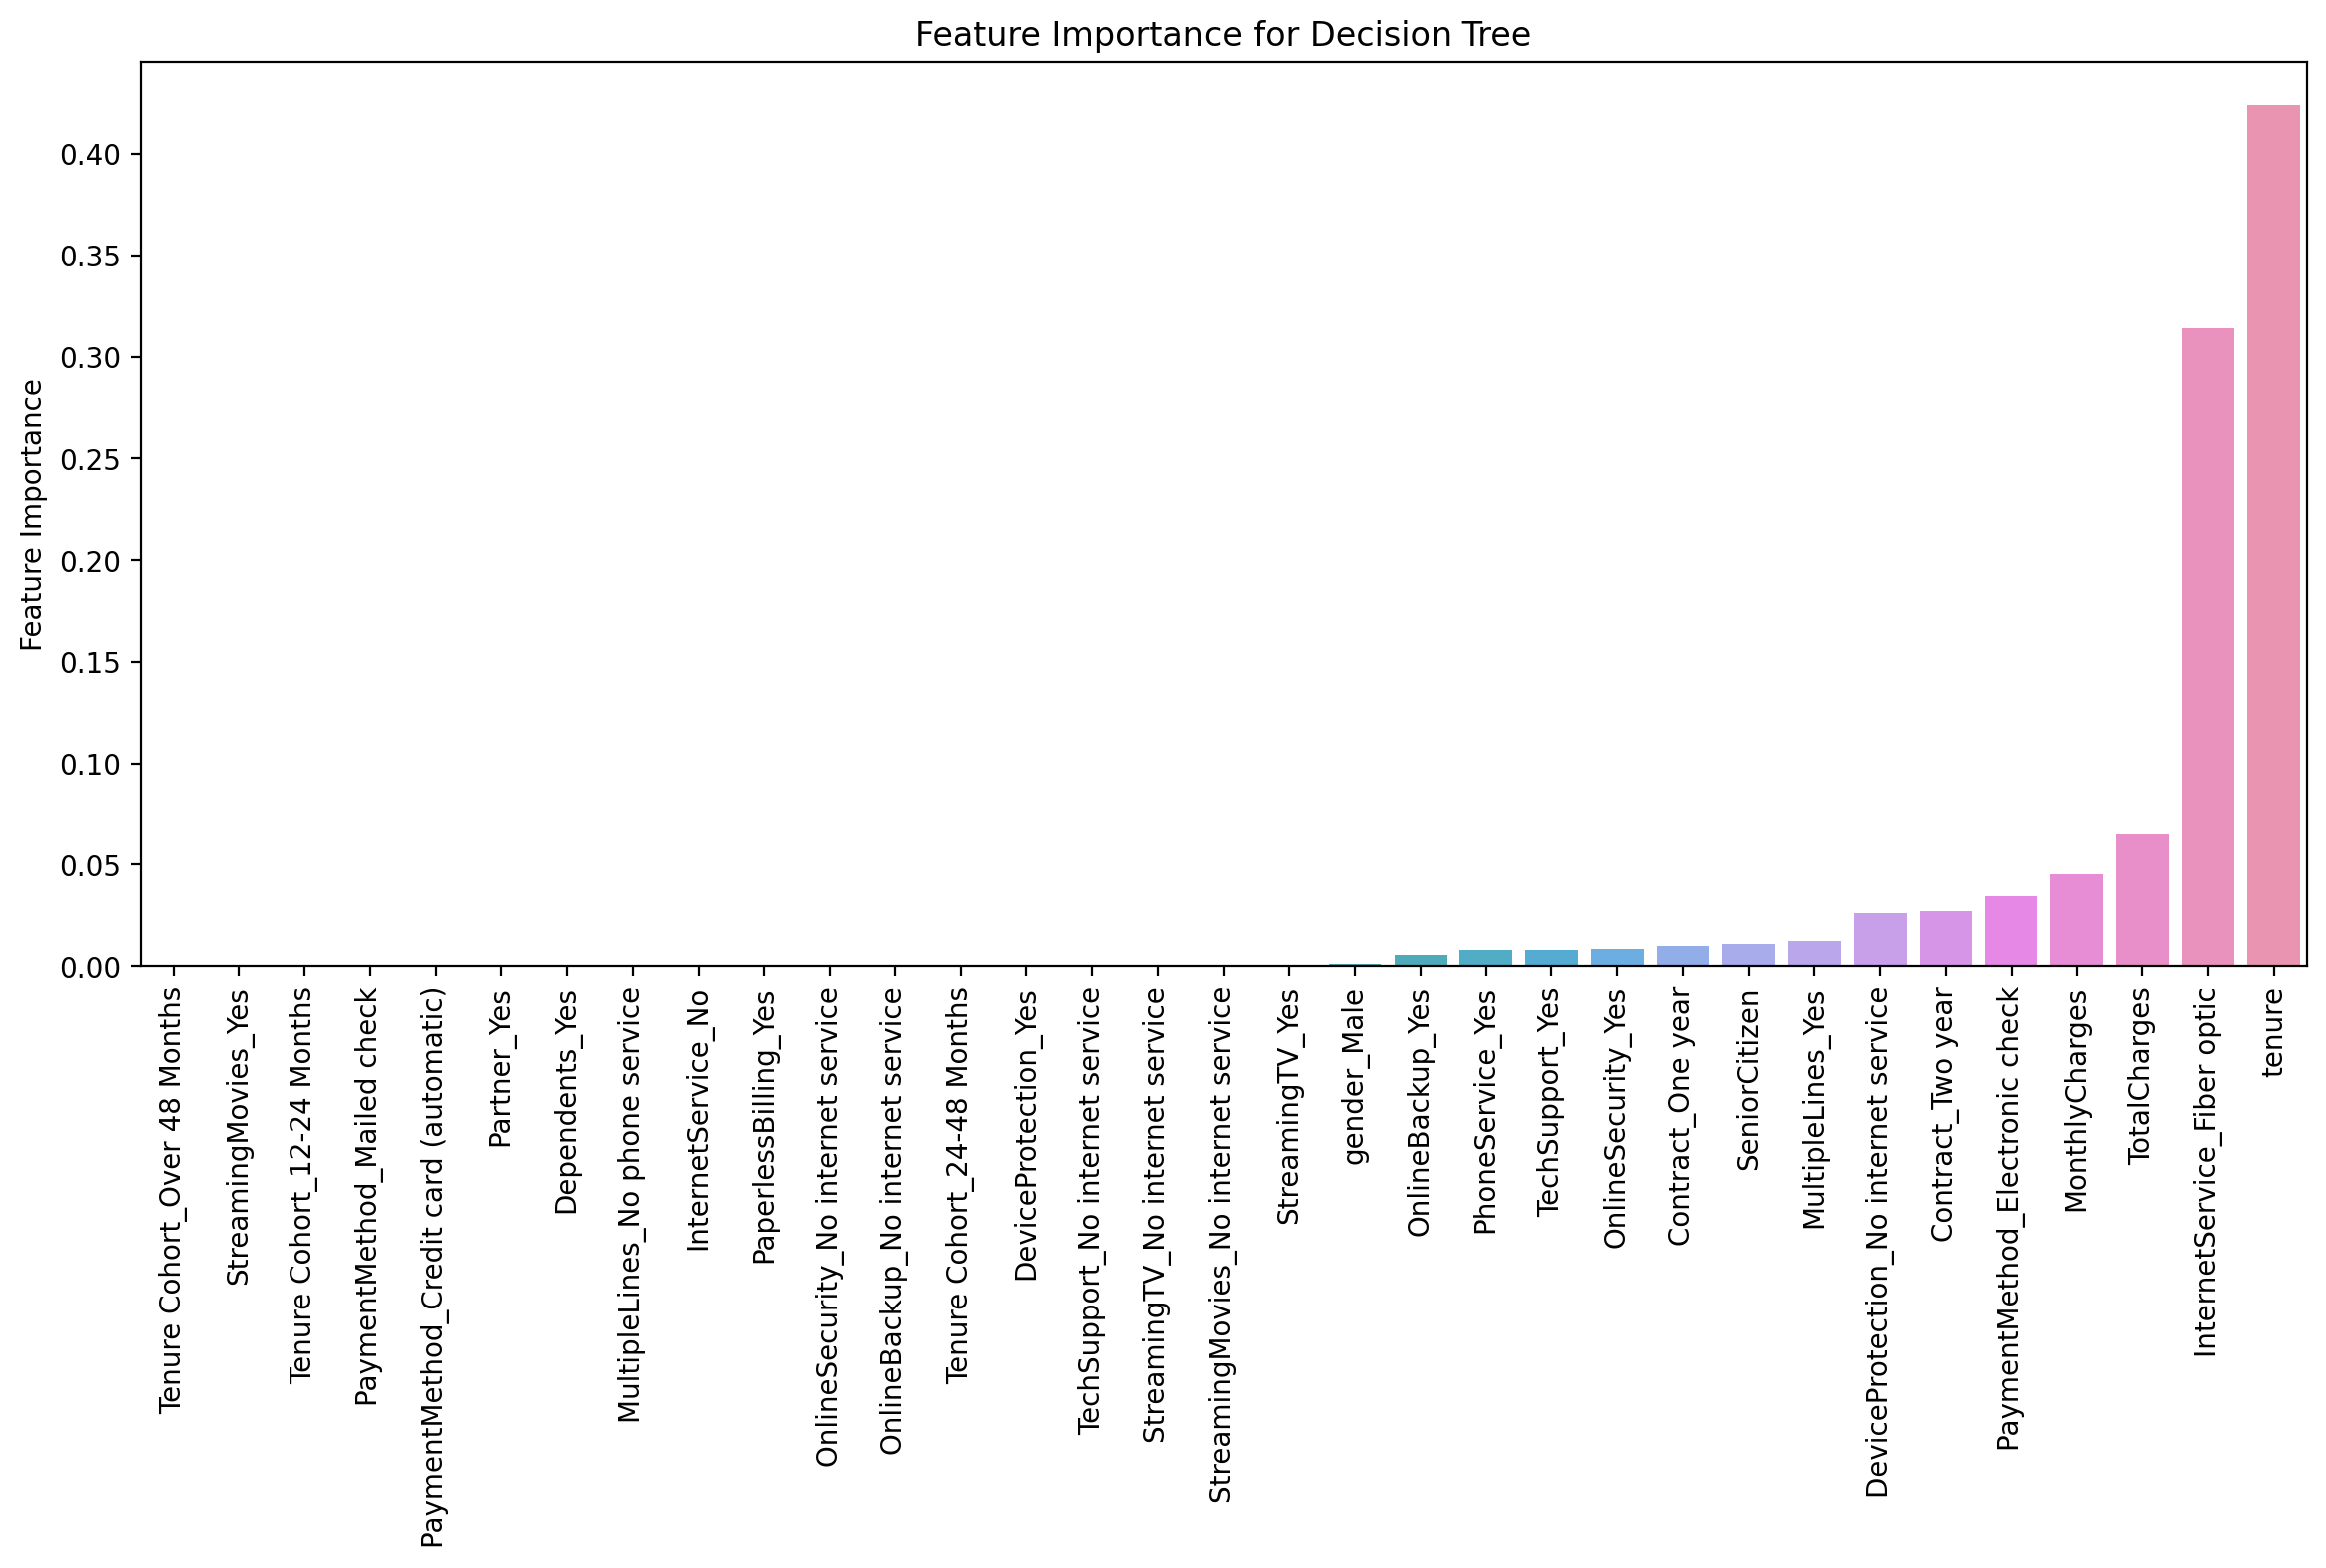

<img src='hugetree.png'>

## Random Forest

**TASK: Create a Random Forest model and create a classification report and confusion matrix from its predicted results on the test set.**

In [ ]:
#CODE HERE

              precision    recall  f1-score   support

          No       0.86      0.89      0.87       557
         Yes       0.52      0.44      0.48       147

    accuracy                           0.80       704
   macro avg       0.69      0.67      0.68       704
weighted avg       0.79      0.80      0.79       704



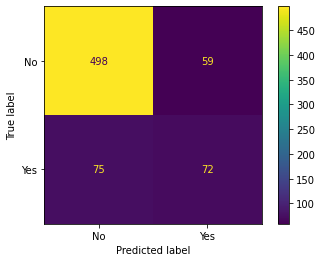

## Boosted Trees

**TASK: Use AdaBoost or Gradient Boosting to create a model and report back the classification report and plot a confusion matrix for its predicted results**

In [ ]:
#CODE HERE

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



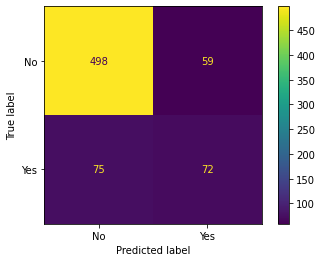

**TASK: Analyze your results, which model performed best for you?**

In [ ]:
# With base models, we got best performance from an AdaBoostClassifier, but note, we didn't do any gridsearching AND most models performed about the same on the data set.

### Great job!

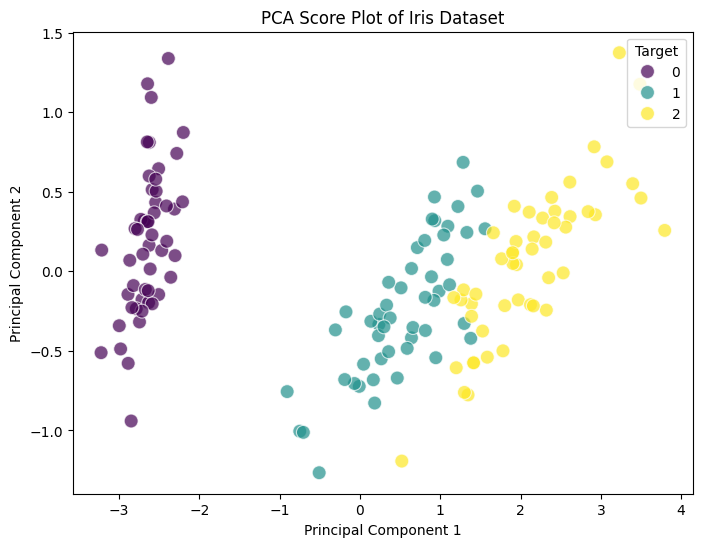

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pandas as pd

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Feature data
y = iris.target  # Target labels

# Perform PCA to reduce to two principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame for easy plotting
df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df['Target'] = y

# Plotting the score plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Target', data=df, palette='viridis', s=100, alpha=0.7)
plt.title("PCA Score Plot of Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Target", loc='upper right')
plt.show()


Ranked Feature Pairs based on Separability Score:
           Feature 1          Feature 2        Score
0  petal length (cm)   petal width (cm)  1070.084165
1  sepal length (cm)  petal length (cm)   649.712842
2   sepal width (cm)  petal length (cm)   614.660611
3  sepal length (cm)   petal width (cm)   539.635824
4   sepal width (cm)   petal width (cm)   504.583593
5  sepal length (cm)   sepal width (cm)    84.212271


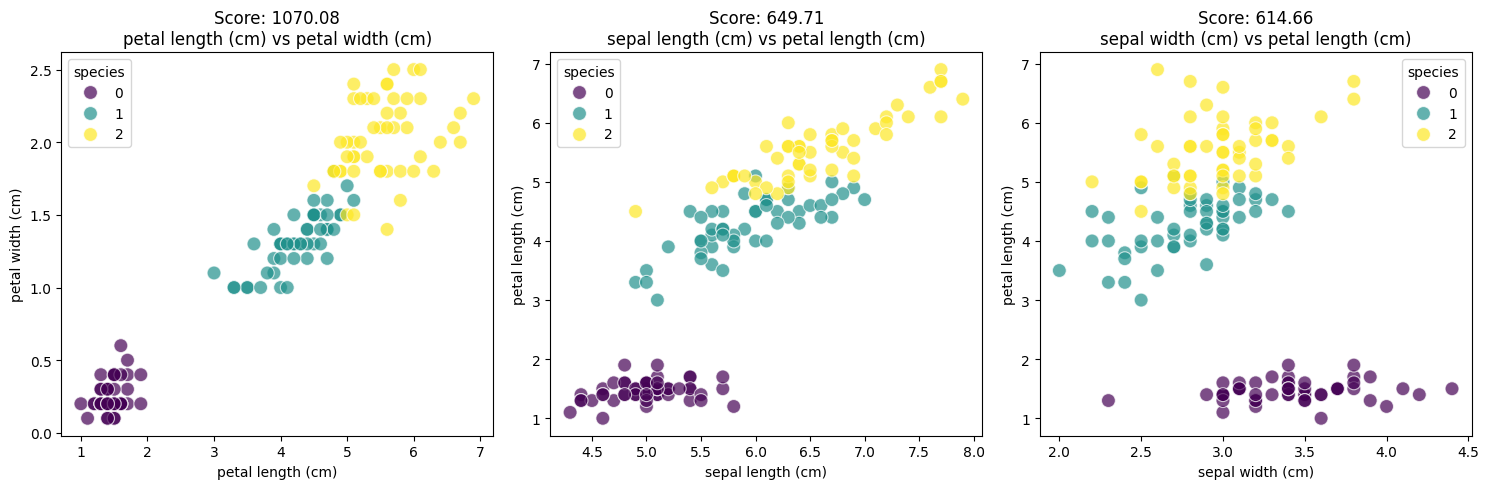

In [3]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.feature_selection import f_classif

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Create a DataFrame for easier manipulation
df = pd.DataFrame(X, columns=feature_names)
df['species'] = y

# Calculate ANOVA F-statistics for each feature pair
feature_pairs = list(itertools.combinations(feature_names, 2))
scores = []

for (feat1, feat2) in feature_pairs:
    # Create a 2D dataset for the current feature pair
    X_pair = df[[feat1, feat2]]

    # Calculate the ANOVA F-statistic for separability based on species
    f_stat, _ = f_classif(X_pair, y)
    avg_f_stat = np.mean(f_stat)  # Use the mean of F-statistics for both features

    # Append the feature pair and score to the list
    scores.append((feat1, feat2, avg_f_stat))

# Convert to DataFrame and sort by F-statistic score
scores_df = pd.DataFrame(scores, columns=['Feature 1', 'Feature 2', 'Score'])
scores_df = scores_df.sort_values(by='Score', ascending=False).reset_index(drop=True)

# Display the ranked pairs
print("Ranked Feature Pairs based on Separability Score:")
print(scores_df)

# Plot the top 3 feature pairs
plt.figure(figsize=(15, 5))
top_n = 3  # Adjust this to plot more pairs if desired

for i in range(top_n):
    feat1 = scores_df.loc[i, 'Feature 1']
    feat2 = scores_df.loc[i, 'Feature 2']

    plt.subplot(1, top_n, i + 1)
    sns.scatterplot(data=df, x=feat1, y=feat2, hue='species', palette='viridis', s=100, alpha=0.7)
    plt.title(f"Score: {scores_df.loc[i, 'Score']:.2f}\n{feat1} vs {feat2}")
    plt.xlabel(feat1)
    plt.ylabel(feat2)

plt.tight_layout()
plt.show()


Ranked Feature Pairs based on ANOVA F-statistics:
           Feature 1          Feature 2  ANOVA Score
0  petal length (cm)   petal width (cm)  1070.084165
1  sepal length (cm)  petal length (cm)   649.712842
2   sepal width (cm)  petal length (cm)   614.660611
3  sepal length (cm)   petal width (cm)   539.635824
4   sepal width (cm)   petal width (cm)   504.583593
5  sepal length (cm)   sepal width (cm)    84.212271

Ranked Feature Pairs based on Chi-square Score:
           Feature 1          Feature 2  Chi-square Score
0  petal length (cm)   petal width (cm)         28.670002
1  sepal length (cm)   petal width (cm)         20.927671
2  sepal length (cm)  petal length (cm)         19.119605
3   sepal width (cm)   petal width (cm)         17.474401
4   sepal width (cm)  petal length (cm)         15.666335
5  sepal length (cm)   sepal width (cm)          7.924004

Ranked Feature Pairs based on Inter-cluster Distance:
           Feature 1          Feature 2  Inter-cluster Distance
0  pe

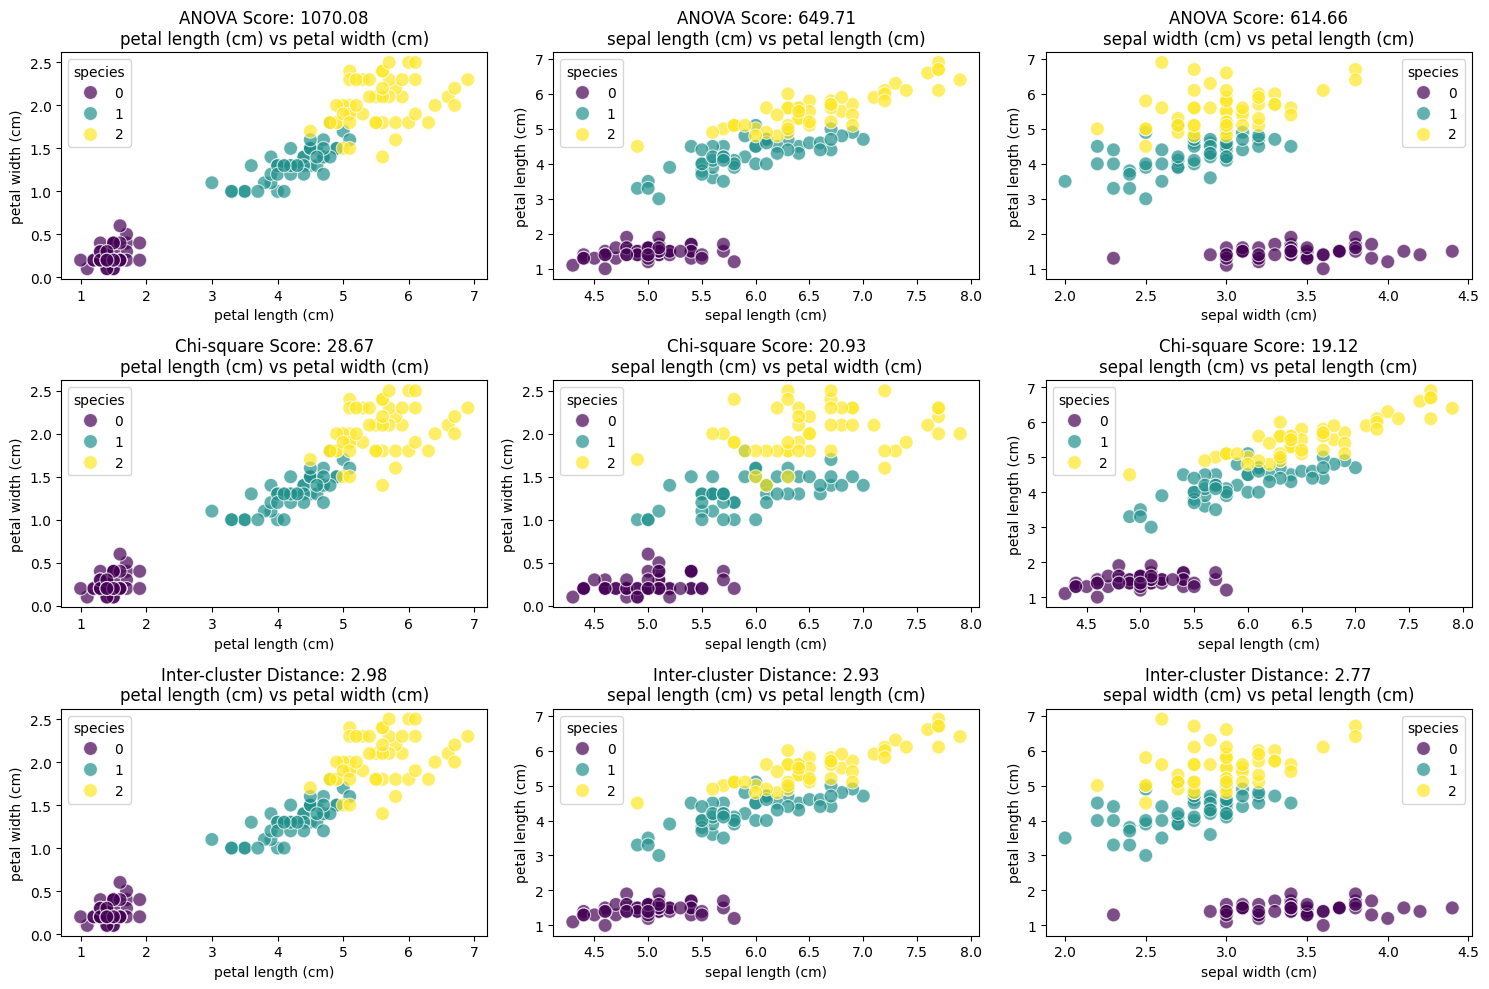

In [4]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.feature_selection import f_classif, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import euclidean

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Create a DataFrame for easier manipulation
df = pd.DataFrame(X, columns=feature_names)
df['species'] = y

# Initialize a scaler for Chi-square (to normalize data to [0, 1])
scaler = MinMaxScaler()

# Generate all feature pairs
feature_pairs = list(itertools.combinations(feature_names, 2))

# Initialize lists to store scores for each metric
anova_scores = []
chi_square_scores = []
intercluster_distances = []

for (feat1, feat2) in feature_pairs:
    # Subset data for the feature pair
    X_pair = df[[feat1, feat2]]

    ### ANOVA F-statistics
    f_stat, _ = f_classif(X_pair, y)
    avg_f_stat = np.mean(f_stat)  # Average F-statistic for the feature pair
    anova_scores.append((feat1, feat2, avg_f_stat))

    ### Chi-Square
    X_pair_scaled = scaler.fit_transform(X_pair)  # Scale to [0, 1] range for Chi-square
    chi_stat, _ = chi2(X_pair_scaled, y)
    avg_chi_stat = np.mean(chi_stat)  # Average Chi-square statistic
    chi_square_scores.append((feat1, feat2, avg_chi_stat))

    ### Inter-cluster Distance
    # Compute the mean of each class for the two features
    class_means = X_pair.groupby(df['species']).mean().values
    intercluster_dist = np.mean([
        euclidean(class_means[i], class_means[j])
        for i in range(len(class_means))
        for j in range(i + 1, len(class_means))
    ])
    intercluster_distances.append((feat1, feat2, intercluster_dist))

# Convert scores to DataFrames for sorting and ranking
anova_df = pd.DataFrame(anova_scores, columns=['Feature 1', 'Feature 2', 'ANOVA Score']).sort_values(by='ANOVA Score', ascending=False).reset_index(drop=True)
chi_square_df = pd.DataFrame(chi_square_scores, columns=['Feature 1', 'Feature 2', 'Chi-square Score']).sort_values(by='Chi-square Score', ascending=False).reset_index(drop=True)
intercluster_df = pd.DataFrame(intercluster_distances, columns=['Feature 1', 'Feature 2', 'Inter-cluster Distance']).sort_values(by='Inter-cluster Distance', ascending=False).reset_index(drop=True)

# Display the rankings
print("Ranked Feature Pairs based on ANOVA F-statistics:")
print(anova_df)
print("\nRanked Feature Pairs based on Chi-square Score:")
print(chi_square_df)
print("\nRanked Feature Pairs based on Inter-cluster Distance:")
print(intercluster_df)

# Plotting top pairs for each metric (optional)
plt.figure(figsize=(15, 10))
top_n = 3  # Number of top pairs to plot

# Plot for ANOVA
for i in range(top_n):
    feat1 = anova_df.loc[i, 'Feature 1']
    feat2 = anova_df.loc[i, 'Feature 2']
    plt.subplot(3, top_n, i + 1)
    sns.scatterplot(data=df, x=feat1, y=feat2, hue='species', palette='viridis', s=100, alpha=0.7)
    plt.title(f"ANOVA Score: {anova_df.loc[i, 'ANOVA Score']:.2f}\n{feat1} vs {feat2}")
    plt.xlabel(feat1)
    plt.ylabel(feat2)

# Plot for Chi-square
for i in range(top_n):
    feat1 = chi_square_df.loc[i, 'Feature 1']
    feat2 = chi_square_df.loc[i, 'Feature 2']
    plt.subplot(3, top_n, top_n + i + 1)
    sns.scatterplot(data=df, x=feat1, y=feat2, hue='species', palette='viridis', s=100, alpha=0.7)
    plt.title(f"Chi-square Score: {chi_square_df.loc[i, 'Chi-square Score']:.2f}\n{feat1} vs {feat2}")
    plt.xlabel(feat1)
    plt.ylabel(feat2)

# Plot for Inter-cluster Distance
for i in range(top_n):
    feat1 = intercluster_df.loc[i, 'Feature 1']
    feat2 = intercluster_df.loc[i, 'Feature 2']
    plt.subplot(3, top_n, 2 * top_n + i + 1)
    sns.scatterplot(data=df, x=feat1, y=feat2, hue='species', palette='viridis', s=100, alpha=0.7)
    plt.title(f"Inter-cluster Distance: {intercluster_df.loc[i, 'Inter-cluster Distance']:.2f}\n{feat1} vs {feat2}")
    plt.xlabel(feat1)
    plt.ylabel(feat2)

plt.tight_layout()
plt.show()
